### **Exploratory Data Analysis (EDA)**

In this section, we will conduct exploratory data analysis (EDA) to gain a deeper understanding of the characteristics and behaviors of the customers. The goal is to identify relevant patterns, detect potential anomalies, and understand the distribution of the selected variables for segmentation. Additionally, the relationships between variables will be analyzed through visualizations and statistical metrics that will allow us to make informed decisions for the next stage of the process: customer segmentation.

The key variables to analyze include the number of clicks `n_clicks`, the number of visits `n_visitas`, the purchase amount `monto_compras`, the discount amount `monto_descuentos`, the time since the first purchase `dias_primera_compra`, and the customer profile `info_perfil`.

In [1]:
import sys
import os
sys.path.append(os.path.abspath("..")) 
from customer_segmentation.plot import plot_boxplot, plot_hist, plot_scatter, plot_correlation_matrix, plot_pairplot
from customer_segmentation.dataset import load_dataset

In [2]:
# Loading cleaned dataset
dataset_path = "../data/processed/cleaned_dataset.csv"
df = load_dataset(dataset_path)

#### **Univariate Analysis**

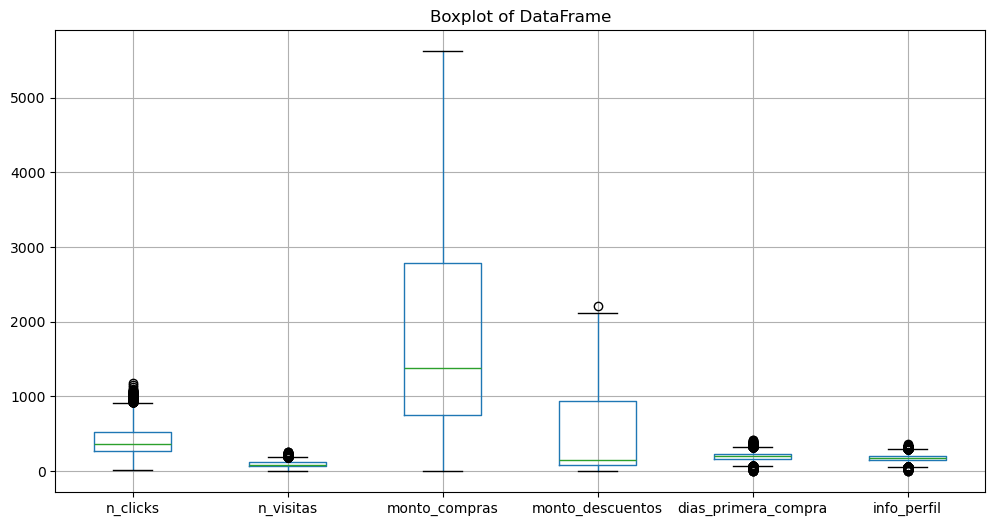

In [3]:
# Viewing the distributions of all columns cleaned
plot_boxplot(df)

Visualizing the new distributions of the numeric columns after data cleaning confirms that there are no longer any anomalous records with negative values, as none of these distributions show a lower whisker or a value below the origin.

Furthermore, it can be established that none of the distributions have been significantly affected, as they still retain their original structures. It is worth noting that the current presence of outliers is due to the decision to preserve these values, as they may contain valuable information due to their representative size.

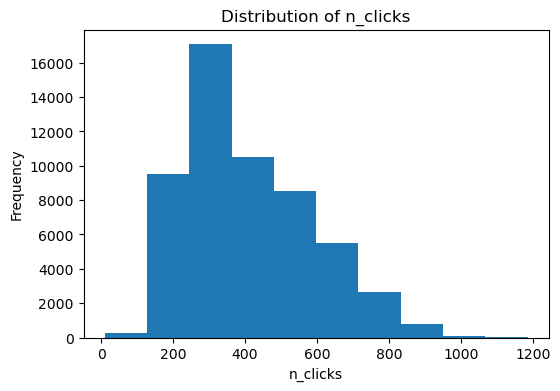

In [4]:
# Viewing distribution of n_clicks
plot_hist(df, "n_clicks")

The distribution of the `n_clicks` column is asymmetric and skewed to the right. According to its graph, it can be determined that a large portion of customers are highly interested in frequently checking updates on the store's products. They typically make approximately between 200 and 600 clicks. This could represent an average behavior for them.

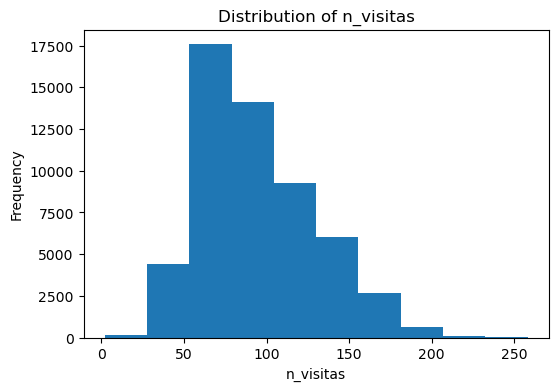

In [5]:
# Viewing distribution of n_visitas
plot_hist(df, "n_visitas")

The distribution of the `n_visitas` column is similar to that of the `n_clicks` column; it is asymmetric and skewed to the right. Based on its graph, it can be established that most customers show a high interest in frequently visiting the online store. They typically make approximately between 50 and 150 visits, which could symbolize an average characteristic for them.

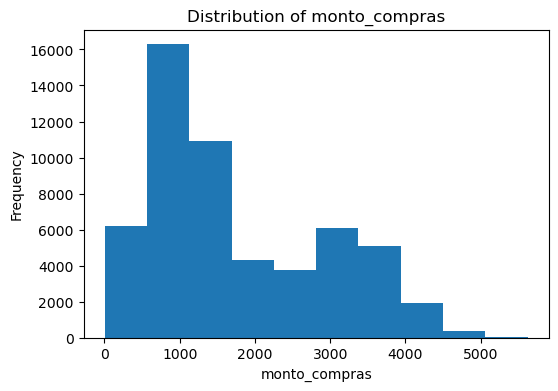

In [6]:
# Viewing distribution of monto_compras
plot_hist(df, "monto_compras")

The distribution of the `monto_compras` column is asymmetric and skewed to the right. However, it is not a very uniform distribution. According to its graph, it is possible to identify two large dispersed groups representing the majority of customers. The first group spends between $0 and $1500, while the second group spends between $3000 and $4000 on purchases. This allows for the identification of regular buyers with higher purchasing power compared to others.

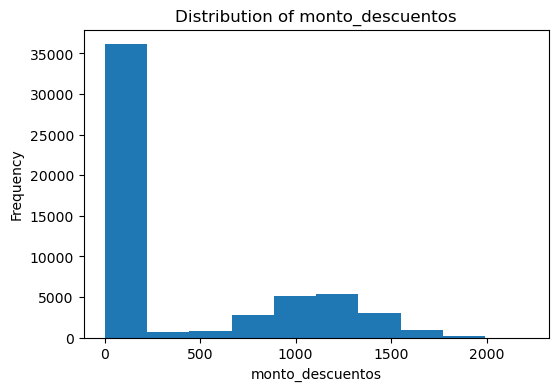

In [7]:
# Viewing distribution of monto_descuentos
plot_hist(df, "monto_descuentos")

The distribution of the `monto_descuentos` column is asymmetric and skewed to the right. However, it is not a uniform distribution at all. Based on its graph, it can be determined that, similar to the `monto_compras` column, it presents two large dispersed groups. The first group has a total discount ranging between 0% and 200%, while the second group has a total discount ranging between 600% and 1400%. This could be related to regular customers who are relatively new to the online store compared to those who have been there for a longer time.

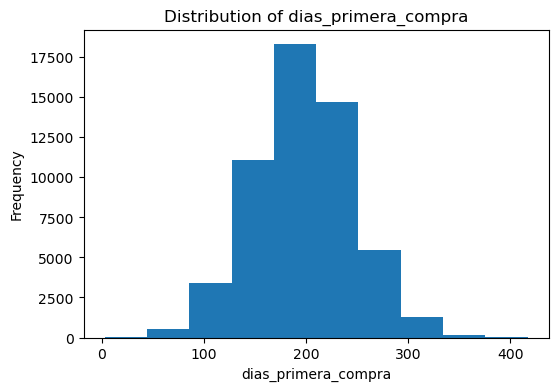

In [8]:
# Viewing distribution of dias_primera_compra
plot_hist(df, "dias_primera_compra")

The distribution of the `dias_primera_compra` column is symmetrical and resembles a normal distribution. According to its graph, it can be established that most customers have been regular clients of the online store for quite some time, as approximately between 120 and 240 days have passed since their first purchase. In contrast, very few new and long-standing customers are part of the store.

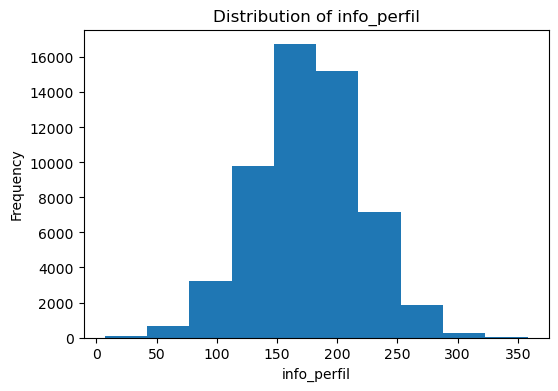

In [9]:
# Viewing distribution of info_perfil
plot_hist(df, "info_perfil")

The distribution of the `info_perfil` column is similar to that of the dias_primera_compra column; it is symmetrical and resembles a normal distribution. Based on its graph, it can be noted that most customers have a score between 105 and 245 points. This could represent an average behavior for them.

#### **Multivariate Analysis**

In this section, we aim to uncover patterns and relationships between multiple variables. Multivariate analysis is critical for identifying interactions that could not be observed in univariate or bivariate analyses. We focus on the following:

- **Linear relationships** using Pearson correlation.

- **Non-linear relationships** with Spearman and Kendall correlation methods.

- **Visual representation** through scatter plots and pairplots.

##### **Correlation Methods**

The following methods are used to measure relationships between variables:

| Method    | Description                              | Advantages                    | Disadvantages                | Best Use                     |
|-----------|------------------------------------------|-------------------------------|------------------------------|------------------------------|
| Pearson   | Measures linear relationships.          | Simple and fast.              | Only detects linear trends.  | For normally distributed data. |
| Spearman  | Measures monotonic relationships.        | Captures non-linear trends.   | Sensitive to ties in data.   | For ranked or ordinal data.    |
| Kendall   | Measures ordinal concordance.           | Robust to outliers.           | Computationally expensive.   | For small datasets with ordinal data. |

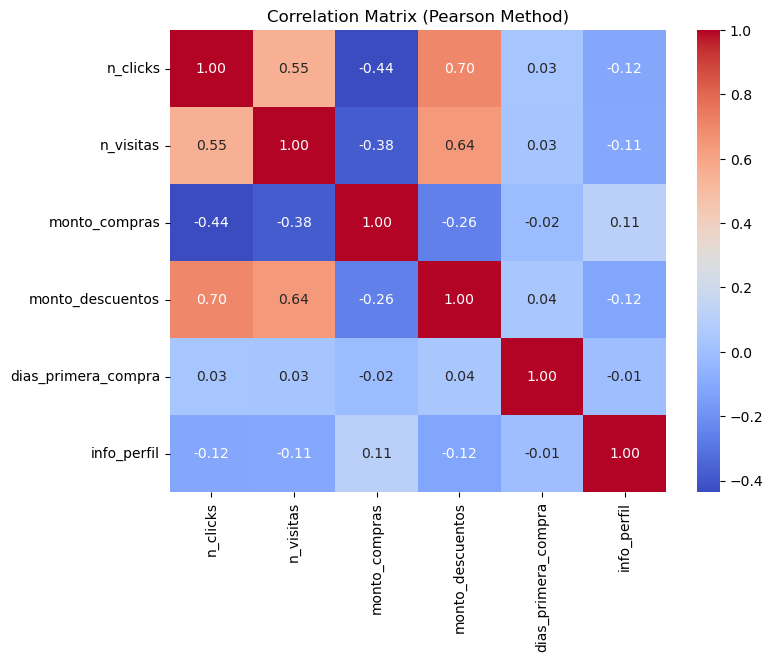

In [10]:
# Viewing lineal correlation
plot_correlation_matrix(df, "pearson")

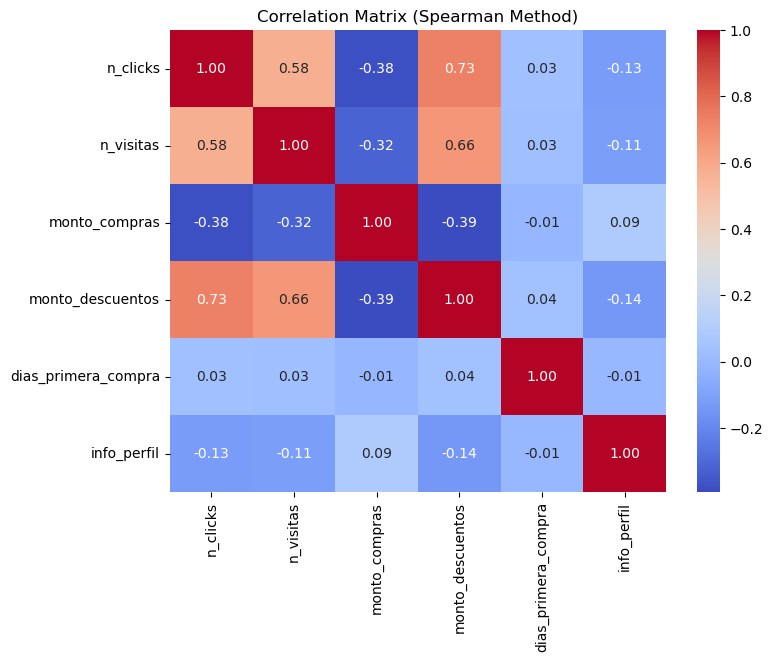

In [11]:
# Viewing non lineal correlation
plot_correlation_matrix(df, "spearman")

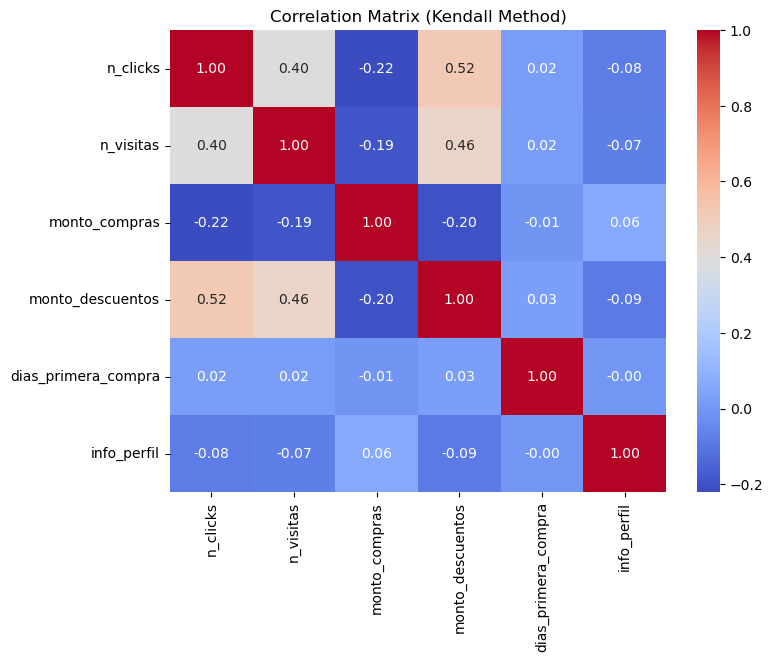

In [12]:
# Viewing non lineal correlation
plot_correlation_matrix(df, "kendall")

| Variables                     | Pearson | Spearman | Kendall | Observations                                  |
|-------------------------------|---------|----------|---------|----------------------------------------------|
| `n_clicks` vs `monto_descuentos` | 0.70    | 0.73     | 0.52    | Consistent across methods. Strong relationship. |
| `n_visitas` vs `monto_descuentos` | 0.64    | 0.66     | 0.46    | Similar between methods. Moderate-to-strong relationship. |
| `n_clicks` vs `n_visitas`        | 0.55    | 0.58     | 0.41    | Moderate positive relationship.               |
| `n_clicks` vs `monto_compras`    | -0.44   | -0.38    | -0.31   | Inverse relationship. Pearson more sensitive. |
| `n_visitas` vs `monto_compras`   | -0.38   | -0.32    | -0.27   | Weak inverse relationship.                    |
| `monto_compras` vs `monto_descuentos` | -0.26   | -0.39    | -0.20   | Weak correlation with stronger non-linear trend. |

Based on these results and observing these matrices of correlation coefficients between different pairs of columns, it is possible to identify some direct and inverse relationships worth studying. For this analysis, we will consider weak to perfect relationships, i.e., all relationships between column pairs with a correlation coefficient between -1.00 and -0.20 or 0.20 and 1.00.

##### **Strong Relationships**

These column pairs have a strong and direct relationship since their correlation coefficients are positive and fall between 0.60 and 0.80. This means that if one increases or decreases, the other does as well.

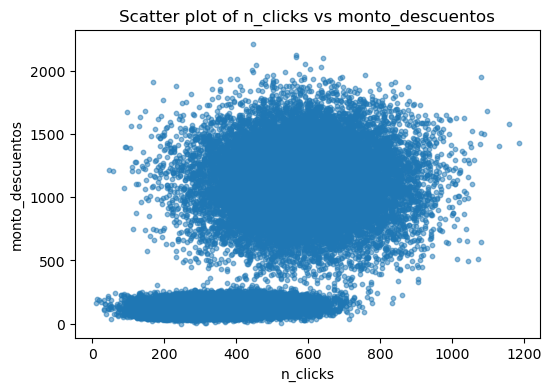

In [13]:
# Viewing relationship between n_clicks and monto_descuentos
plot_scatter(df, "n_clicks", "monto_descuentos")

- **n_clicks vs monto_descuentos:** The correlation coefficient between `n_clicks` and `monto_descuentos` is 0.70 (Pearson), which is relatively high. This indicates a strong positive linear relationship between these variables. Customers who interact with the online store through frequent clicks seem to receive greater discounts. This aligns with a potential business strategy that rewards customer engagement rather than the amount spent. Interestingly, non-linear correlation metrics such as Spearman (0.73) suggest this relationship might have additional nuances, possibly reflecting tailored discount campaigns for highly active users.

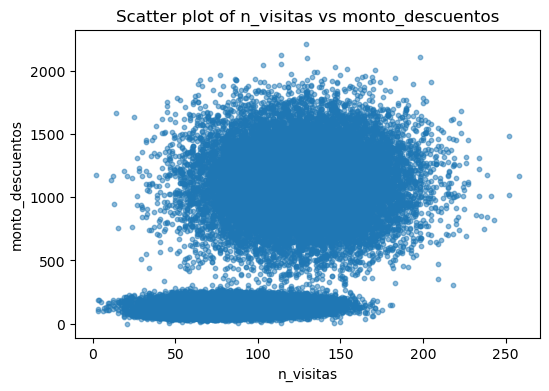

In [14]:
# Viewing relationship between n_visitas and monto_descuentos
plot_scatter(df, "n_visitas", "monto_descuentos")

- **n_visitas vs monto_descuentos:** The correlation coefficient of 0.64 (Pearson) between `n_visitas` and `monto_descuentos` also reflects a strong positive relationship. Customers who visit the store more frequently tend to receive more discounts, supporting the notion that engagement, rather than spending behavior, drives discounts. This finding aligns closely with the analysis of `n_clicks` vs `monto_descuentos`, as these variables are likely interconnected. The Spearman value of 0.66 reinforces the consistency of this observation across different correlation methods, with possible non-linear elements enhancing the engagement-discount dynamic.

##### **Moderate Relationships**

These column pairs have a moderate relationship since their correlation coefficients are positive or negative and fall between -0.80 and -0.40 or 0.40 and 0.60.

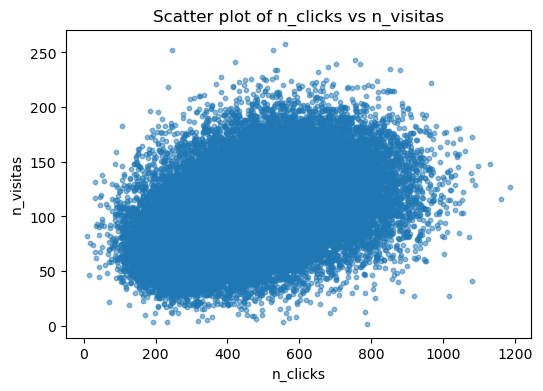

In [15]:
# Viewing relationship between n_clicks and n_visitas
plot_scatter(df, "n_clicks", "n_visitas")

- **n_clicks vs n_visitas:** With a Pearson correlation of 0.55, the relationship between `n_clicks` and `n_visitas` is moderately strong and positive, indicating that customers who visit the website more often tend to click more frequently. This is a logical result, as higher visit frequency naturally provides more opportunities for clicks. The Spearman coefficient (0.58) suggests a similar relationship, while slight deviations in rankings hint at variability in user interaction patterns. Overall, this finding supports the assumption of a direct relationship between visit frequency and click behavior.

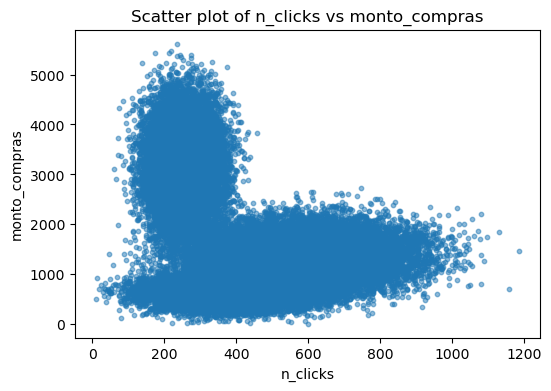

In [16]:
# Viewing relationship between n_clicks and monto_compras
plot_scatter(df, "n_clicks", "monto_compras")

- **n_clicks vs monto_compras:** The correlation between `n_clicks` and `monto_compras` is -0.44 (Pearson), indicating a moderate inverse relationship. Surprisingly, this suggests that customers who engage with the store through frequent clicks are less likely to make significant purchases. This trend might reflect customers browsing extensively without committing to purchases, possibly waiting for discounts or exploring product options. The Spearman correlation (-0.38) highlights a weaker non-linear relationship, but the negative direction remains consistent. This result raises questions about the effectiveness of click-driven engagement strategies in driving revenue.

#### **Weak Relationships**

These column pairs have a weak and inverse relationship since their correlation coefficients are negative and fall between -0.40 and -0.20. This means that if one increases, the other decreases, and vice versa.

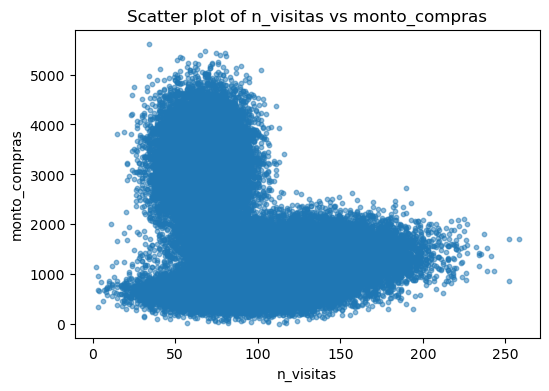

In [17]:
# Viewing relationship between n_visitas and monto_compras
plot_scatter(df, "n_visitas", "monto_compras")

- **n_visitas vs monto_compras:** The correlation coefficient between `n_visitas` and `monto_compras` is -0.38 (Pearson), which is relatively weak and inverse. Similar to the previous pair, this result indicates that higher visit frequency does not necessarily translate to larger purchases. This weak relationship may reflect a browsing-focused user segment that prioritizes exploration over actual spending. The Spearman coefficient (-0.32) highlights a slightly weaker non-linear relationship, but the negative trend remains intact. This suggests that visit frequency alone might not be a reliable predictor of customer spending.

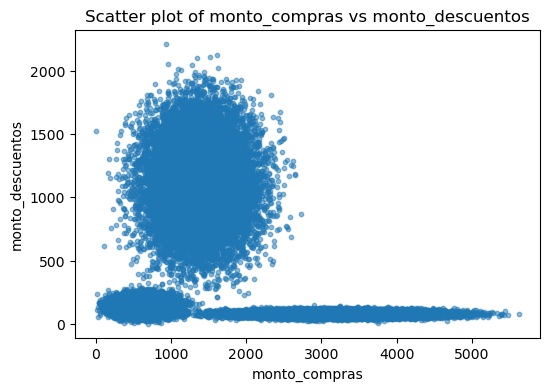

In [18]:
# Viewing relationship between monto_compras and monto_descuentos
plot_scatter(df, "monto_compras", "monto_descuentos")

- **monto_compras vs monto_descuentos:** With a Pearson correlation of -0.26, the relationship between `monto_compras` and `monto_descuentos` is weak and inverse. Contrary to conventional expectations, this suggests that customers making larger purchases are not receiving proportionately higher discounts. This result challenges the idea of volume-based discounts, hinting instead at a uniform discount strategy regardless of spending behavior. The stronger Spearman coefficient (-0.39) implies potential non-linear factors affecting this relationship, such as targeted discounts based on customer segments or past behavior.